In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp2d, interp1d, CloughTocher2DInterpolator
import scipy.integrate as spi


80
[3.42836e+19 2.51726e+19 1.83802e+19 1.33358e+19 9.42352e+18 6.83739e+18
 4.92850e+18 3.52608e+18 2.44710e+18 1.74791e+18 1.23869e+18 8.69982e+17
 5.89376e+17 4.12359e+17 2.85753e+17 1.95859e+17 1.28445e+17 8.74451e+16
 5.88299e+16 3.90424e+16 2.44993e+16 1.60855e+16 1.04053e+16 6.61624e+15
 3.90721e+15 2.44458e+15 1.50093e+15 9.01591e+14 4.89199e+14 2.86974e+14
 1.64365e+14 9.15399e+13 4.40477e+13 2.37033e+13 1.23754e+13 6.23418e+12
 2.52168e+12 1.20810e+12 5.57323e+11 2.45782e+11 7.67509e+10 3.13401e+10
 1.22215e+10 4.51918e+09 9.39347e+08 3.03994e+08 9.30297e+07 2.71696e+07
 2.93709e+06 6.60044e+05 1.35592e+05 2.71722e+04 1.15988e+03 1.43544e+02
 1.44973e+01 1.39159e+00 1.67369e-02 7.66441e-04 2.26970e-05 4.81076e-07
 9.12324e-10 7.70551e-12 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00]


C:\Users\veron\AppData\Local\Temp\ipykernel_55940\2854598541.py:25: RuntimeWarning: divide by zero encountered in log10
  plt.plot(time, np.log10(Ev*Ev*Ev*(dN_dEv)))


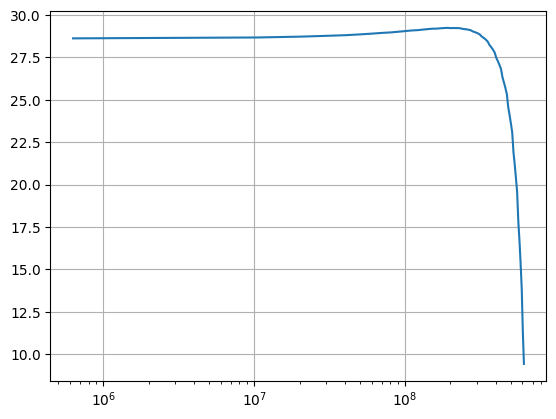

In [2]:
data = np.loadtxt('SN_IIn/SNIIn_20_block_9.dat')

Ev_all = data[:,0]
Ev = Ev_all[Ev_all > 1e12]
Ev = Ev/1e9

block_number=9

S_IIn_start = 1e5 * pow(10., 0.1 * (block_number - 1))
S_IIn_stop = 1e8 * pow(10., 0.1 * (block_number))

# Estrai l'ottava colonna corrispondente ai valori di Ev>1Tev
dN_dEv = data[:, 7][Ev_all > 1e12]
dN_dEv = dN_dEv/1e9
lunghezza_Ev = len(Ev)
print(lunghezza_Ev)
time = np.linspace(S_IIn_start,S_IIn_stop,len(Ev))







plt.plot(time, np.log10(Ev*Ev*Ev*(dN_dEv)))
print(dN_dEv)
plt.grid(True)
#plt.yscale('log')
plt.xscale('log')
#plt.ylim(bottom=-30)


Shape of Ev: (80,)
Shape of time: (80,)
Shape of dN_dEv: (80,)
80
1074.61 [2.72108e+28]
1240.94 [1.99794241e+28]
1433.01 [1.45883147e+28]
1654.82 [1.05845882e+28]
1910.95 [7.47942217e+27]
2206.73 [5.42681783e+27]
2548.3 [3.91173703e+27]
2942.73 [2.7986401e+27]
3398.21 [1.94225661e+27]
3924.19 [1.38731141e+27]
4531.58 [9.83144881e+26]
5232.99 [6.90502345e+26]
6042.96 [4.67786127e+26]
6978.31 [3.27288216e+26]
8058.42 [2.26801378e+26]
9305.72 [1.55452755e+26]
10746.1 [1.01946447e+26]
12409.4 [6.94049378e+25]
14330.1 [4.66931315e+25]
16548.2 [3.09878466e+25]
19109.5 [1.94450277e+25]
22067.3 [1.27670176e+25]
25483.0 [8.25865828e+24]
29427.3 [5.25129167e+24]
33982.1 [3.10114194e+24]
39241.9 [1.94025649e+24]
45315.8 [1.19128405e+24]
52329.9 [7.15590322e+23]
60429.6 [3.88275914e+23]
69783.1 [2.27770482e+23]
80584.2 [1.30456053e+23]
93057.2 [7.26549694e+22]
107461.0 [3.49605396e+22]
124094.0 [1.88132447e+22]
143301.0 [9.82232129e+21]
165482.0 [4.94805169e+21]
191095.0 [2.00145055e+21]
220673.0 

C:\Users\veron\AppData\Local\Temp\ipykernel_55940\3637446858.py:23: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  valori_integrali = np.array([trapz(interp_func(Ev[i], time), time) for i in range(len(Ev))])
C:\Users\veron\AppData\Local\Temp\ipykernel_55940\3637446858.py:25: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  valori_integrali_2 = np.array([trapz(interp_func(time[i], Ev), Ev) for i in range(len(time))])
C:\Users\veron\AppData\Local\Temp\ipykernel_55940\3637446858.py:38: RuntimeWarning: divide by zero encountered in log10
  plt.plot(time, np.log10(valori_integrali_2*Ev*Ev*Ev))
C:\Users\veron\AppData\Local\Temp\ipykernel_55940\3637446858.py:38: RuntimeWarning: invalid value encountered in log10
  plt.plot(time, np.log10(valori_integrali_2*Ev*Ev*Ev))


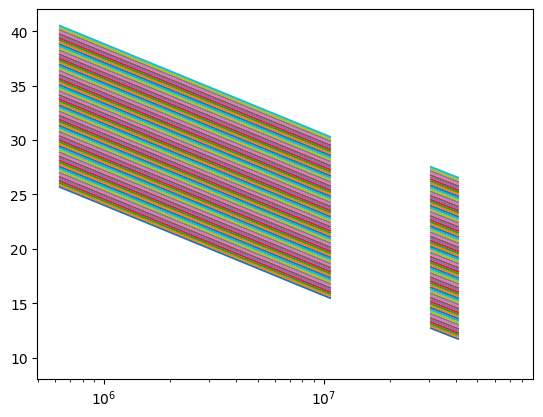

In [16]:
from scipy.interpolate import RectBivariateSpline
from scipy.integrate import trapz
E_values = np.linspace(min(Ev), max(Ev))
t_values = np.linspace(min(time), max(time))

# Ora creiamo una meshgrid di energia e tempo
E_values, t_values = np.meshgrid(Ev, time)

dN_dEv_matrix = np.outer(dN_dEv, np.ones(80))

# Creiamo una matrice bidimensionale per dN_dEv

#fill_value = (min(dN_dEv) + max(dN_dEv)) / 2.0

print("Shape of Ev:", Ev.shape)
print("Shape of time:", time.shape)
print("Shape of dN_dEv:", dN_dEv.shape)


interp_func = RectBivariateSpline(Ev, time , dN_dEv_matrix)
print(len(dN_dEv_matrix))

valori_integrali = np.array([trapz(interp_func(Ev[i], time), time) for i in range(len(Ev))])

valori_integrali_2 = np.array([trapz(interp_func(time[i], Ev), Ev) for i in range(len(time))])

for i in range(len(Ev)):
    print(Ev[i] ,valori_integrali[i])
#print(dN_dEv)
# Trasponiamo valori_integrali se necessario


# Aggiungiamo un valore fittizio per il primo elemento
#differenza_tempo = np.insert(differenza_tempo, 0, differenza_tempo[0])

#func = [interp_func(3.4e9, a) for a in t]

plt.plot(time, np.log10(valori_integrali_2*Ev*Ev*Ev))
plt.xscale('log')
#plt.xlim(0, 0.2e15)

(4.761786674741355e+21, 52866452.046511136)
x: 1074.61 risultato integrale1: 51171125541544.055
x: 1240.94 risultato integrale1: 51171125541544.055
x: 1433.01 risultato integrale1: 51171125541544.055
x: 1654.82 risultato integrale1: 51171125541544.055
x: 1910.95 risultato integrale1: 51171125541544.055
x: 2206.73 risultato integrale1: 51171125541544.055
x: 2548.3 risultato integrale1: 51171125541544.055
x: 2942.73 risultato integrale1: 51171125541544.055
x: 3398.21 risultato integrale1: 51171125541544.055
x: 3924.19 risultato integrale1: 51171125541544.055
x: 4531.58 risultato integrale1: 51171125541544.055
x: 5232.99 risultato integrale1: 51171125541544.055
x: 6042.96 risultato integrale1: 51171125541544.055
x: 6978.31 risultato integrale1: 51171125541544.055
x: 8058.42 risultato integrale1: 51171125541544.055
x: 9305.72 risultato integrale1: 51171125541544.055
x: 10746.1 risultato integrale1: 51171125541544.055
x: 12409.4 risultato integrale1: 51171125541544.055
x: 14330.1 risultato 

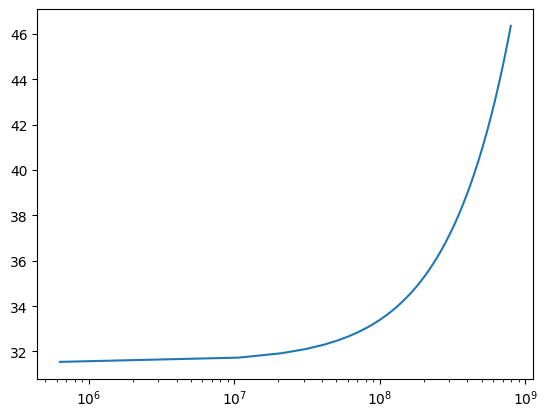

In [6]:
import scipy.integrate as spi

def integranda(Ev, t1):
    return interp_func(Ev, t1)

def integrale1(Ev):
    result1, _ = spi.quad(integranda, min(time), max(time), args=(Ev,), limit=1000)
    return result1
def integrale2(t1):
    result2, _ = spi.quad(integranda, min(Ev), max(Ev), args=(t1), limit=1000)
    return result2



rate = spi.quad(integrale1, min(Ev), max(Ev), limit=1000)
print(rate)



flux_dEv=[]
for x in Ev:
    result1 = integrale1(x)
    print("x:", x, "risultato integrale1:", result1)
    flux_dEv.append(result1)


flux_dt=[]
for x in time:
    result2 = integrale2(x)
    print("x:", x, "risultato integrale2:", result2)
    flux_dt.append(result2)

print(flux_dEv)

#print(flux_dt)

plt.plot(time, np.log10(Ev*Ev*Ev*flux_dt))

#plt.plot(E, np.log(E**2*flux))  
plt.xscale('log') 

In [5]:
E_new = np.linspace(min(E), max(E), len(E))
print(len(E_new))
print(len(E))
E_neu = interp1d(E_new, E, kind='linear')


for i in E:
    print(E_neu(i))

NameError: name 'E' is not defined

[1.05925373e+10 1.18850223e+10 1.33352143e+10 1.49623566e+10
 1.67880402e+10 1.88364909e+10 2.11348904e+10 2.37137371e+10
 2.66072506e+10 2.98538262e+10 3.34965439e+10 3.75837404e+10
 4.21696503e+10 4.73151259e+10 5.30884444e+10 5.95662144e+10
 6.68343918e+10 7.49894209e+10 8.41395142e+10 9.44060876e+10
 1.05925373e+11 1.18850223e+11 1.33352143e+11 1.49623566e+11
 1.67880402e+11 1.88364909e+11 2.11348904e+11 2.37137371e+11
 2.66072506e+11 2.98538262e+11 3.34965439e+11 3.75837404e+11
 4.21696503e+11 4.73151259e+11 5.30884444e+11 5.95662144e+11
 6.68343918e+11 7.49894209e+11 8.41395142e+11 9.44060876e+11
 1.05925373e+12 1.18850223e+12 1.33352143e+12 1.49623566e+12
 1.67880402e+12 1.88364909e+12 2.11348904e+12 2.37137371e+12
 2.66072506e+12 2.98538262e+12 3.34965439e+12 3.75837404e+12
 4.21696503e+12 4.73151259e+12 5.30884444e+12 5.95662144e+12
 6.68343918e+12 7.49894209e+12 8.41395142e+12 9.44060876e+12
 1.05925373e+13 1.18850223e+13 1.33352143e+13 1.49623566e+13
 1.67880402e+13 1.883649

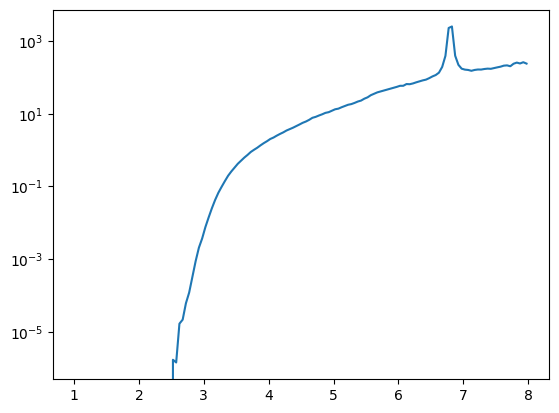

In [ ]:
aeff = np.loadtxt('aeff_ARCA230_flavor_nue_selection_shower[4128].txt', skiprows=1, delimiter=',')

E_log= aeff[:, 0]

E_G = 10**E_log

E_v = E_G*1e9

E_v_values = np.linspace(min(E_v), max(E_v))

A = aeff[:, 1]

#print(A)
Area = interp1d(E_G, A, kind='linear')
plt.plot(E_log, A)
plt.yscale('log')


#for b in E_v:
    #print(Area(b))

print(E_v)
print(E_G)

In [ ]:
def n_evintegranda(Ev, t1):
    return interp_func(Ev, t1)*Area(Ev)

def integrale2(t1):
    result, _ = spi.quad(n_evintegranda, min(E), max(E), args=(t1,), epsabs=1e-10, epsrel=1e-10, limit=1000)
    return result


    
n_ev = spi.quad(integrale2, 10**3, 10**5.8, limit=1000)
print(n_ev)



C:\Users\veron\AppData\Local\Temp\ipykernel_4564\200277328.py:5: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, _ = spi.quad(n_evintegranda, min(E), max(E), args=(t1,), epsabs=1e-10, epsrel=1e-10, limit=1000)


(5.316722847122178e+43, 3.270454618514501e+36)


C:\Users\veron\AppData\Local\Temp\ipykernel_4564\200277328.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  n_ev = spi.quad(integrale2, 10**3, 10**5.8, limit=1000)


In [ ]:
d_model= 3.08567758128E+23

def number_of_events(d):
    return (1/(d/d_model)**2)*4*np.pi*n_ev[0]

print(number_of_events(d_model))



#plt.plot(distanza, number_of_events(distanza))

#plt.yscale('log')



6.681190975076818e+44
